In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsd

In [224]:
df=pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


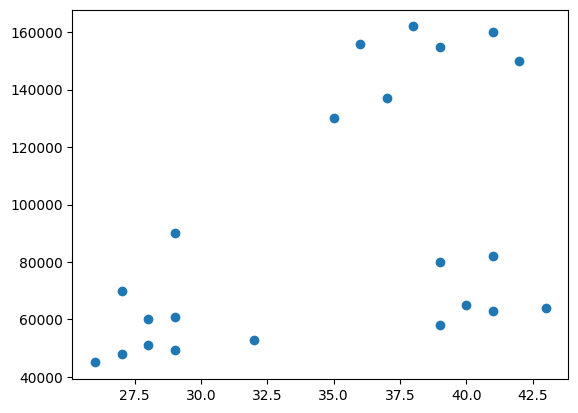

In [225]:
plt.scatter(df['Age'],df['Income($)'])

In [226]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [227]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [228]:
df.drop(['Name'],axis=1,inplace=True)
df

,Age,Income($),cluster
0,27,70000,2
1,29,90000,0
2,29,61000,2
3,28,60000,2
4,42,150000,1
5,39,155000,1
6,41,160000,1
7,38,162000,1
8,36,156000,1
9,35,130000,1


In [229]:
df1=df.loc[df['cluster']==0]
df2=df.loc[df['cluster']==1]
df3=df.loc[df['cluster']==2]

df1

,Age,Income($),cluster
1,29,90000,0
19,39,80000,0
20,41,82000,0


In [230]:
df2

,Age,Income($),cluster
4,42,150000,1
5,39,155000,1
6,41,160000,1
7,38,162000,1
8,36,156000,1
9,35,130000,1
10,37,137000,1


In [231]:
df3

,Age,Income($),cluster
0,27,70000,2
2,29,61000,2
3,28,60000,2
11,26,45000,2
12,27,48000,2
13,28,51000,2
14,29,49500,2
15,32,53000,2
16,40,65000,2
17,41,63000,2


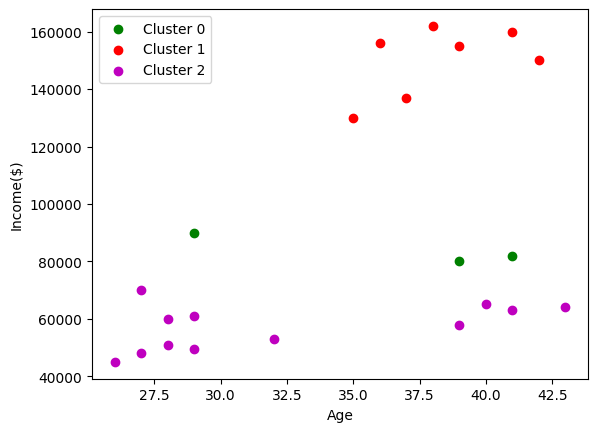

In [232]:
plt.scatter(df1['Age'],df1['Income($)'],color='green',label='Cluster 0')
plt.scatter(df2['Age'],df2['Income($)'],color='red', label='Cluster 1')
plt.scatter(df3['Age'],df3['Income($)'],color='m', label='Cluster 2')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [233]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['Age']=scaler.fit_transform(df[['Age']])
df['Income($)']=scaler.fit_transform(df[['Income($)']])
df

,Age,Income($),cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,0
2,0.176471,0.136752,2
3,0.117647,0.128205,2
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


In [234]:
km=KMeans(n_clusters=3)
df['cluster']=km.fit_predict(df[['Age','Income($)']])

In [235]:
km.cluster_centers_


array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

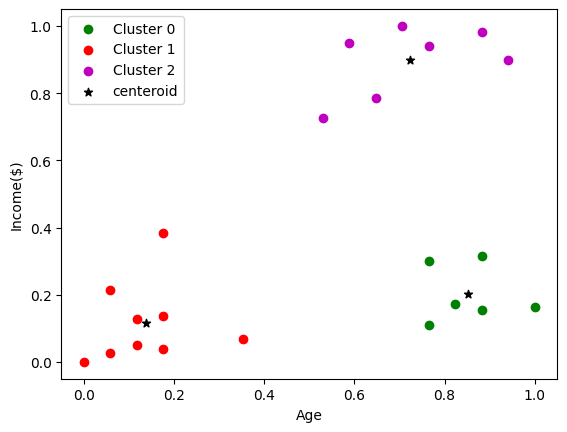

In [236]:
df1=df.loc[df['cluster']==0]
df2=df.loc[df['cluster']==1]
df3=df.loc[df['cluster']==2]

plt.scatter(df1['Age'],df1['Income($)'],color='green',label='Cluster 0')
plt.scatter(df2['Age'],df2['Income($)'],color='red', label='Cluster 1')
plt.scatter(df3['Age'],df3['Income($)'],color='m', label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='k',marker='*',label='centeroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [237]:
df

,Age,Income($),cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,2
5,0.764706,0.940171,2
6,0.882353,0.982906,2
7,0.705882,1.000000,2
8,0.588235,0.948718,2
9,0.529412,0.726496,2


Elbow Method
------------

In [238]:
sse=[]
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [239]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.368773407644059,
 0.2768740621600469,
 0.2203764169077067,
 0.18850242078456822,
 0.16547589166256546,
 0.1351785498977408]

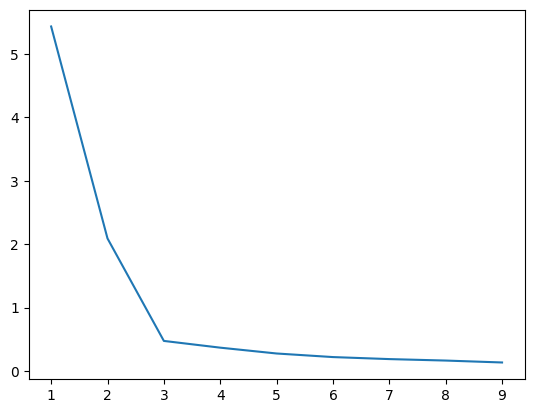

In [240]:
plt.plot(k_range,sse)